# Imports

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import requests
import urllib

import io
import os


/usr/lib/python3/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


# Baixando arquivos (demora, só precisa baixar uma vez)

In [2]:
name_prefix='ABONOP_'
abono_name_base = 'http://repositorio.dados.gov.br/segrt/'
months =['01','02','03','04','05','06','07','08','09','10','11','12']
years = range(2017,2021)
tables = []

In [3]:
for y in years:
  for m in months:
    filename = name_prefix+str(m)+str(y)+'.csv'
    print(filename)
    url = abono_name_base+filename
    print(url)
    #try: #the .csv files goes until 2020-08
    try:
        urllib.request.urlretrieve(url, 'data/'+filename)
    except:
        pass
    table = pd.read_csv(url, encoding = "ISO-8859-1", error_bad_lines=False)
    tables.append(table)
    #except:
    #pass   


ABONOP_012017.csv
http://repositorio.dados.gov.br/segrt/ABONOP_012017.csv


KeyboardInterrupt: 

# Definição das funções

In [4]:
def clear_table(tbl):
    no_duplicates = tbl.drop_duplicates()
    no_null = no_duplicates.dropna(thresh=0)
    return no_null

def describe_dirtness(tbl,csv_name):    
    duplicates = table[tbl.duplicated(table.columns,keep=False)].sort_values('Nome');
    nans = table.isna().sum()
    data = {'table':csv_name,'original_size':[len(table.index)],'duplicates':[len(duplicates.index)],'nans':[len(nans.index)],'removed':-1,'filtered_size':-1}
    info = pd.DataFrame(data)
    return info

def get_year_month_from_filename(csv_name):
    striped_name = csv_name.split('.')[0].split('_')[1]
    month = striped_name[0:2]
    year = striped_name[2:6]
    return (month,year)

def calculate_single_table_dirtness(table,f):
    single_table_dirtness =  describe_dirtness(table,f)    
    single_table_dirtness.at[0,'filtered_size'] = len(clean_table.index)
    single_table_dirtness.at[0,'month'] = get_year_month_from_filename(single_table_dirtness.at[0,'table'])[0]
    single_table_dirtness.at[0,'year'] = get_year_month_from_filename(single_table_dirtness.at[0,'table'])[1]
    single_table_dirtness.at[0,'removed'] = single_table_dirtness.at[0,'duplicates']+single_table_dirtness.at[0,'nans']
    return single_table_dirtness

def parse_float(text):
    if  isinstance(text,str):
        result = float(text.replace(',','.'))
    else: 
        result = text
    return result
    

# lendo o dataset

In [77]:
files = os.listdir('data')
dataset = pd.DataFrame()
all_dirtiness = pd.DataFrame(columns = ['table','month','year','original_size','duplicates','nans','removed','filtered_size'])
for f in files:
    try:
        path = 'data/'+f
        print(path)
        table = pd.read_csv(path, encoding = "ISO-8859-1", delimiter=';', index_col=False, error_bad_lines=False);    
        clean_table = clear_table(table)
        dataset = dataset.append(clean_table)
        single_table_dirtness =  calculate_single_table_dirtness(table,f)
        all_dirtiness = all_dirtiness.append(single_table_dirtness, ignore_index=True)
    except:
        pass
all_dirtiness = all_dirtiness[['table','month','year','original_size','duplicates','nans','removed','filtered_size']]
all_dirtiness.sort_values(['year','month'],inplace=True)

dataset['Val'] = dataset['Val'].map(parse_float)
dataset['Quantidade de meses no Serviço público'] = dataset['Quantidade de meses no Serviço público'].map(parse_float)
dataset['Quantidade de anos no Serviço público'] = dataset['Quantidade de anos no Serviço público'].map(parse_float)

data/ABONOP_022017.csv


b'Skipping line 36991: expected 15 fields, saw 16\n'
/home/ndc/.local/lib/python3.7/site-packages/pandas/core/frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
b'Skipping line 37880: expected 15 fields, saw 16\n'


data/ABONOP_112018.csv
data/ABONOP_112019.csv
data/ABONOP_012018.csv


b'Skipping line 38522: expected 15 fields, saw 16\n'


data/ABONOP_122018.csv


b'Skipping line 38096: expected 15 fields, saw 16\n'


data/ABONOP_042017.csv


b'Skipping line 36775: expected 15 fields, saw 16\n'


data/ABONOP_062019.csv
data/ABONOP_072020.csv
data/ABONOP_042018.csv


b'Skipping line 37895: expected 15 fields, saw 16\n'


data/ABONOP_072019.csv
data/ABONOP_062020.csv
data/ABONOP_042019.csv
data/ABONOP_052018.csv


b'Skipping line 37833: expected 15 fields, saw 16\n'


data/ABONOP_022020.csv
data/ABONOP_032020.csv
data/ABONOP_062018.csv


b'Skipping line 37631: expected 15 fields, saw 16\n'


data/ABONOP_012020.csv
data/ABONOP_032017.csv


b'Skipping line 36994: expected 15 fields, saw 16\n'


data/ABONOP_102019.csv
data/ABONOP_012017.csv
data/ABONOP_102017.csv


b'Skipping line 37979: expected 15 fields, saw 16\n'


data/ABONOP_082019.csv
data/ABONOP_072017.csv


b'Skipping line 37237: expected 15 fields, saw 16\n'


data/Untitled.slides.html


b'Skipping line 24: expected 1 fields, saw 2\nSkipping line 25: expected 1 fields, saw 2\nSkipping line 26: expected 1 fields, saw 2\nSkipping line 27: expected 1 fields, saw 2\nSkipping line 28: expected 1 fields, saw 2\nSkipping line 56: expected 1 fields, saw 2\nSkipping line 76: expected 1 fields, saw 2\nSkipping line 77: expected 1 fields, saw 2\nSkipping line 78: expected 1 fields, saw 2\nSkipping line 81: expected 1 fields, saw 2\nSkipping line 96: expected 1 fields, saw 2\nSkipping line 102: expected 1 fields, saw 2\nSkipping line 103: expected 1 fields, saw 2\nSkipping line 106: expected 1 fields, saw 2\nSkipping line 107: expected 1 fields, saw 2\nSkipping line 111: expected 1 fields, saw 2\nSkipping line 114: expected 1 fields, saw 2\nSkipping line 118: expected 1 fields, saw 2\nSkipping line 121: expected 1 fields, saw 2\nSkipping line 125: expected 1 fields, saw 2\nSkipping line 128: expected 1 fields, saw 2\nSkipping line 131: expected 1 fields, saw 2\nSkipping line 132: 

data/ABONOP_022018.csv


b'Skipping line 38367: expected 15 fields, saw 16\n'


data/ABONOP_082017.csv


b'Skipping line 37431: expected 15 fields, saw 16\n'


data/ABONOP_092017.csv


b'Skipping line 37699: expected 15 fields, saw 16\n'


data/ABONOP_052017.csv


b'Skipping line 37019: expected 15 fields, saw 16\n'


data/ABONOP_032019.csv
data/ABONOP_062017.csv


b'Skipping line 36935: expected 15 fields, saw 16\n'


data/ABONOP_052019.csv
data/ABONOP_082018.csv


b'Skipping line 37580: expected 15 fields, saw 16\n'


data/ABONOP_102018.csv


b'Skipping line 37752: expected 15 fields, saw 16\n'


data/ABONOP_122019.csv
data/ABONOP_122017.csv


b'Skipping line 38496: expected 15 fields, saw 16\n'


data/ABONOP_022019.csv
data/ABONOP_082020.csv
data/ABONOP_042020.csv
data/ABONOP_072018.csv


b'Skipping line 37572: expected 15 fields, saw 16\n'


data/ABONOP_112017.csv


b'Skipping line 38167: expected 15 fields, saw 16\n'


data/ABONOP_012019.csv
data/ABONOP_092018.csv


b'Skipping line 37668: expected 15 fields, saw 16\n'


data/ABONOP_052020.csv
data/ABONOP_092019.csv
data/ABONOP_032018.csv


b'Skipping line 38146: expected 15 fields, saw 16\n'


In [79]:
dataset['Quantidade de anos no Serviço público'] = dataset['Quantidade de anos no Serviço público'].map(parse_float)


# Exibindo quanto de dados ruins (nulos e NaNs) foi removido em cada ano

In [43]:
all_dirtiness

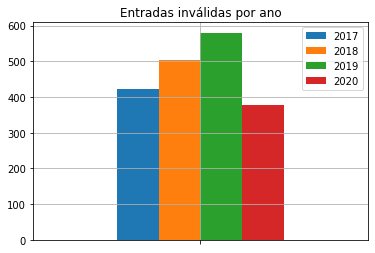

In [9]:
by_year = {}
for y in years:
    by_year[y] = [all_dirtiness[all_dirtiness['year'] == str(y)]['removed'].sum()]
pd.DataFrame(by_year).plot.bar(grid='both',title='Entradas inválidas por ano',xticks=None)
plt.tick_params(labelbottom=False)

# Contando o total de entradas

In [11]:
len(dataset.index)

4353756

In [10]:
dataset.columns

Index(['<!DOCTYPE html>', 'Ano/Mês inicial do abono de permanência', 'CPF',
       'Cidade da residência', 'Denominação do órgão de atuação',
       'Denominação unidade organizacional', 'Descrição do cargo emprego',
       'Nome', 'Nível de Escolaridade',
       'Quantidade de anos no Serviço público',
       'Quantidade de meses no Serviço público', 'Situação servidor',
       'UF da Residência', 'UF da UPAG de vinculação', 'Val'],
      dtype='object')

# Agrupando por estado

In [38]:
by_state=dataset.groupby(by='UF da Residência')

## Com outliers

           AxesSubplot(0.1,0.792857;0.137931x0.107143)
AC    AxesSubplot(0.265517,0.792857;0.137931x0.107143)
AL    AxesSubplot(0.431034,0.792857;0.137931x0.107143)
AM    AxesSubplot(0.596552,0.792857;0.137931x0.107143)
AP    AxesSubplot(0.762069,0.792857;0.137931x0.107143)
BA         AxesSubplot(0.1,0.664286;0.137931x0.107143)
CE    AxesSubplot(0.265517,0.664286;0.137931x0.107143)
DF    AxesSubplot(0.431034,0.664286;0.137931x0.107143)
ES    AxesSubplot(0.596552,0.664286;0.137931x0.107143)
GO    AxesSubplot(0.762069,0.664286;0.137931x0.107143)
MA         AxesSubplot(0.1,0.535714;0.137931x0.107143)
MG    AxesSubplot(0.265517,0.535714;0.137931x0.107143)
MS    AxesSubplot(0.431034,0.535714;0.137931x0.107143)
MT    AxesSubplot(0.596552,0.535714;0.137931x0.107143)
PA    AxesSubplot(0.762069,0.535714;0.137931x0.107143)
PB         AxesSubplot(0.1,0.407143;0.137931x0.107143)
PE    AxesSubplot(0.265517,0.407143;0.137931x0.107143)
PI    AxesSubplot(0.431034,0.407143;0.137931x0.107143)
PR    Axes

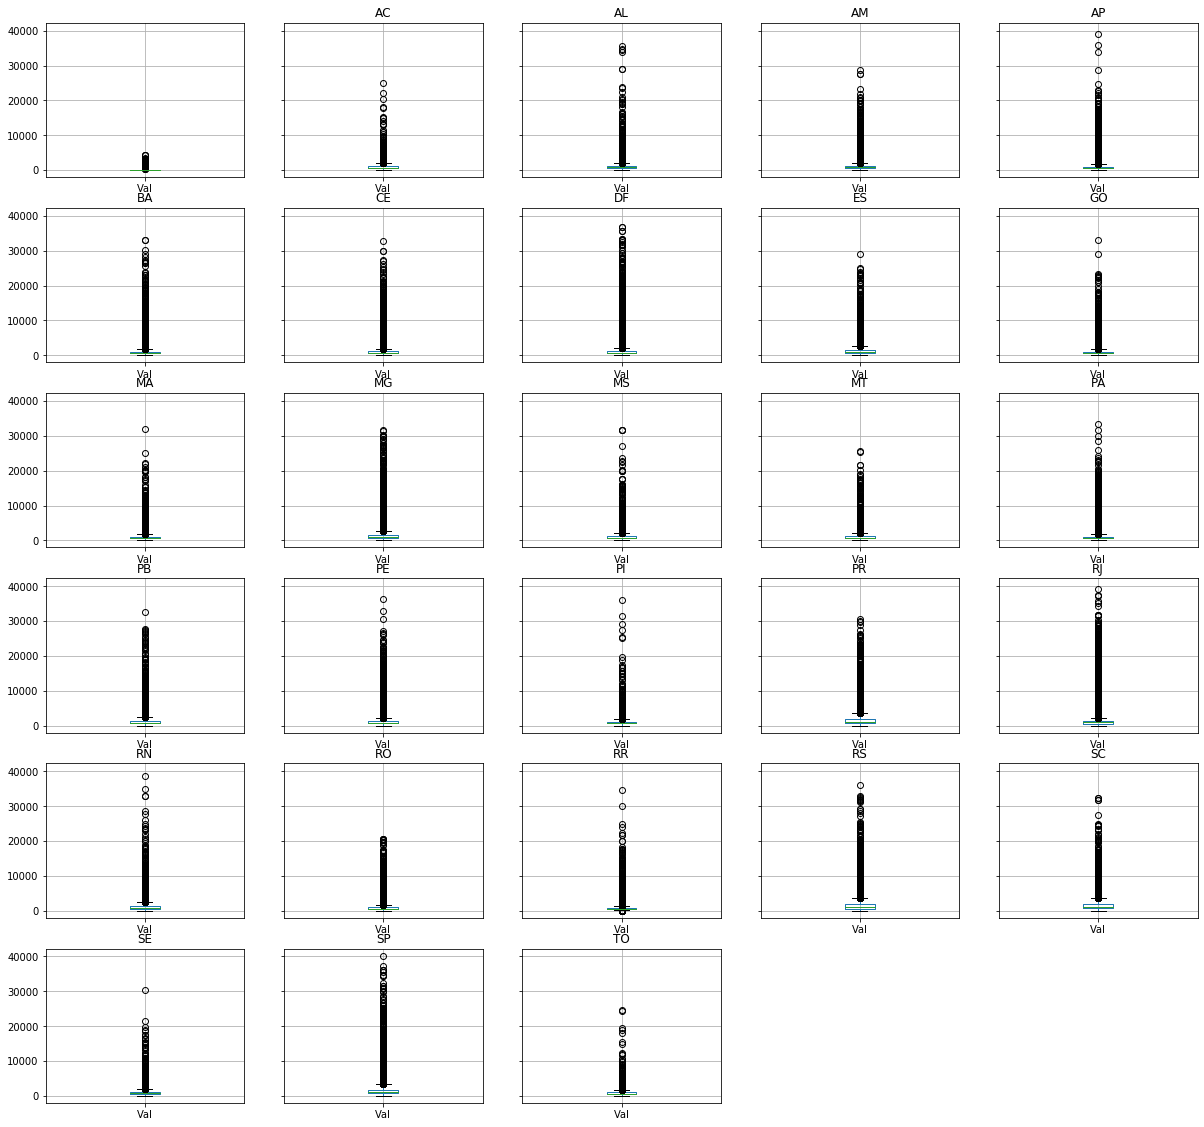

In [39]:
by_state.boxplot(column='Val',  fontsize=10, figsize=(20,20), showfliers=True)

## Sem outliers

           AxesSubplot(0.1,0.792857;0.137931x0.107143)
AC    AxesSubplot(0.265517,0.792857;0.137931x0.107143)
AL    AxesSubplot(0.431034,0.792857;0.137931x0.107143)
AM    AxesSubplot(0.596552,0.792857;0.137931x0.107143)
AP    AxesSubplot(0.762069,0.792857;0.137931x0.107143)
BA         AxesSubplot(0.1,0.664286;0.137931x0.107143)
CE    AxesSubplot(0.265517,0.664286;0.137931x0.107143)
DF    AxesSubplot(0.431034,0.664286;0.137931x0.107143)
ES    AxesSubplot(0.596552,0.664286;0.137931x0.107143)
GO    AxesSubplot(0.762069,0.664286;0.137931x0.107143)
MA         AxesSubplot(0.1,0.535714;0.137931x0.107143)
MG    AxesSubplot(0.265517,0.535714;0.137931x0.107143)
MS    AxesSubplot(0.431034,0.535714;0.137931x0.107143)
MT    AxesSubplot(0.596552,0.535714;0.137931x0.107143)
PA    AxesSubplot(0.762069,0.535714;0.137931x0.107143)
PB         AxesSubplot(0.1,0.407143;0.137931x0.107143)
PE    AxesSubplot(0.265517,0.407143;0.137931x0.107143)
PI    AxesSubplot(0.431034,0.407143;0.137931x0.107143)
PR    Axes

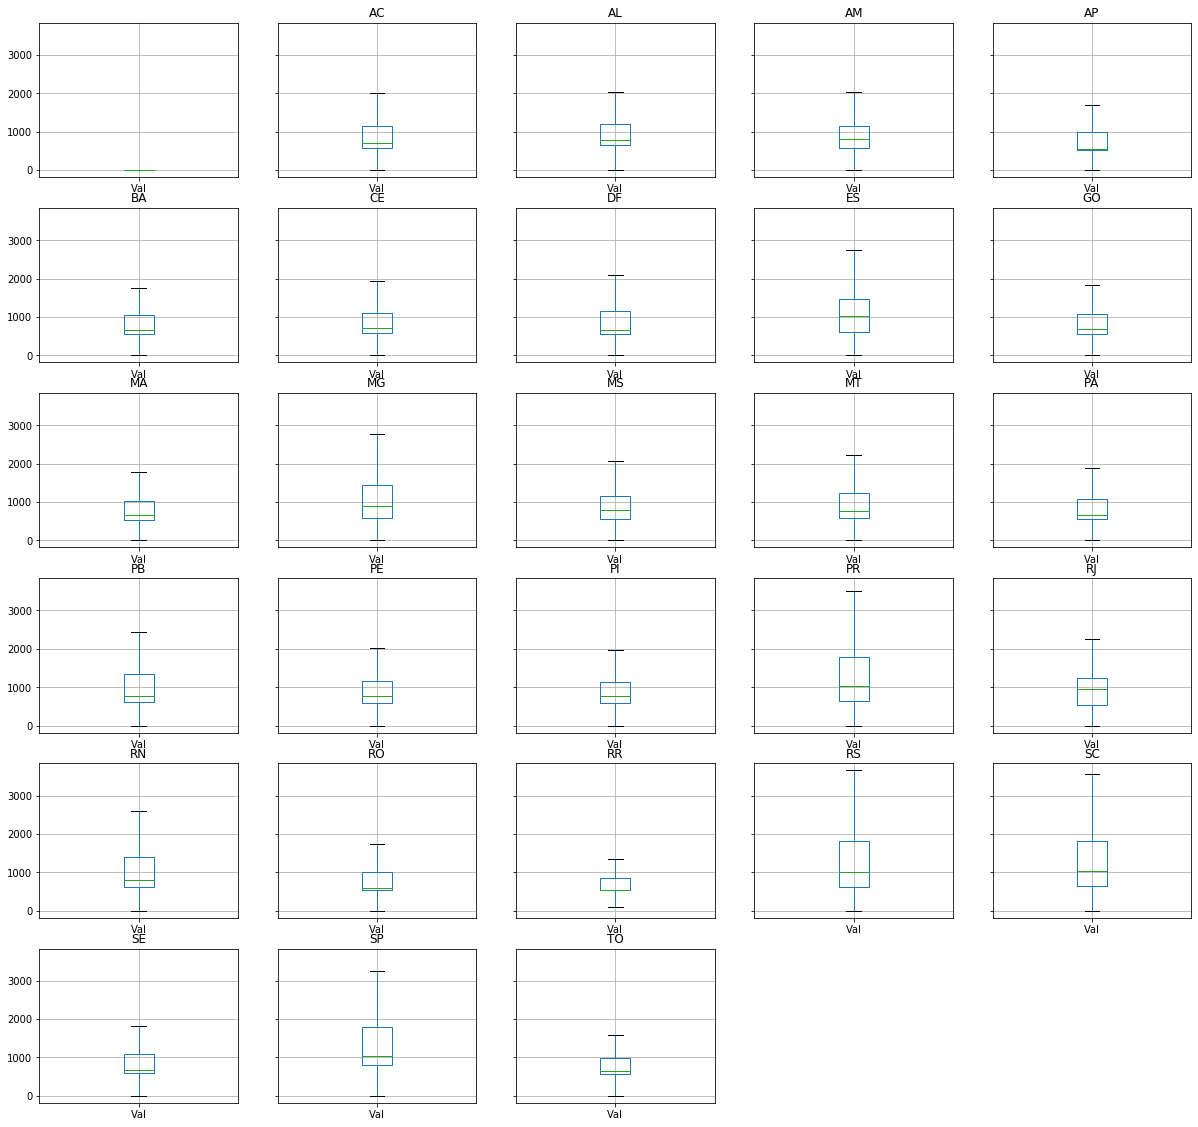

In [40]:
by_state.boxplot(column='Val',  fontsize=10, figsize=(20,20), showfliers=False)

# Abono por escolaridade

In [41]:
by_education = dataset.groupby(by='Nível de Escolaridade')

4A. SERIE DO PRIMEIRO GRAU COMPLETA                   AxesSubplot(0.1,0.736957;0.235294x0.163043)
ALFABETIZADO SEM CURSOS REGULARES                AxesSubplot(0.382353,0.736957;0.235294x0.163043)
DOUTORADO                                        AxesSubplot(0.664706,0.736957;0.235294x0.163043)
ENSINO FUNDAMENTAL                                    AxesSubplot(0.1,0.541304;0.235294x0.163043)
ENSINO FUNDAMENTAL INCOMPLETO                    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
ENSINO MEDIO                                     AxesSubplot(0.664706,0.541304;0.235294x0.163043)
ENSINO SUPERIOR                                       AxesSubplot(0.1,0.345652;0.235294x0.163043)
MESTRADO                                         AxesSubplot(0.382353,0.345652;0.235294x0.163043)
PRIMEIRO GRAU INCOMP.-ATE A 4A.SERIE INCOMP.     AxesSubplot(0.664706,0.345652;0.235294x0.163043)
SEGUNDO GRAU INCOMPLETO                                   AxesSubplot(0.1,0.15;0.235294x0.163043)
SUPERIOR INCOMPLETO 

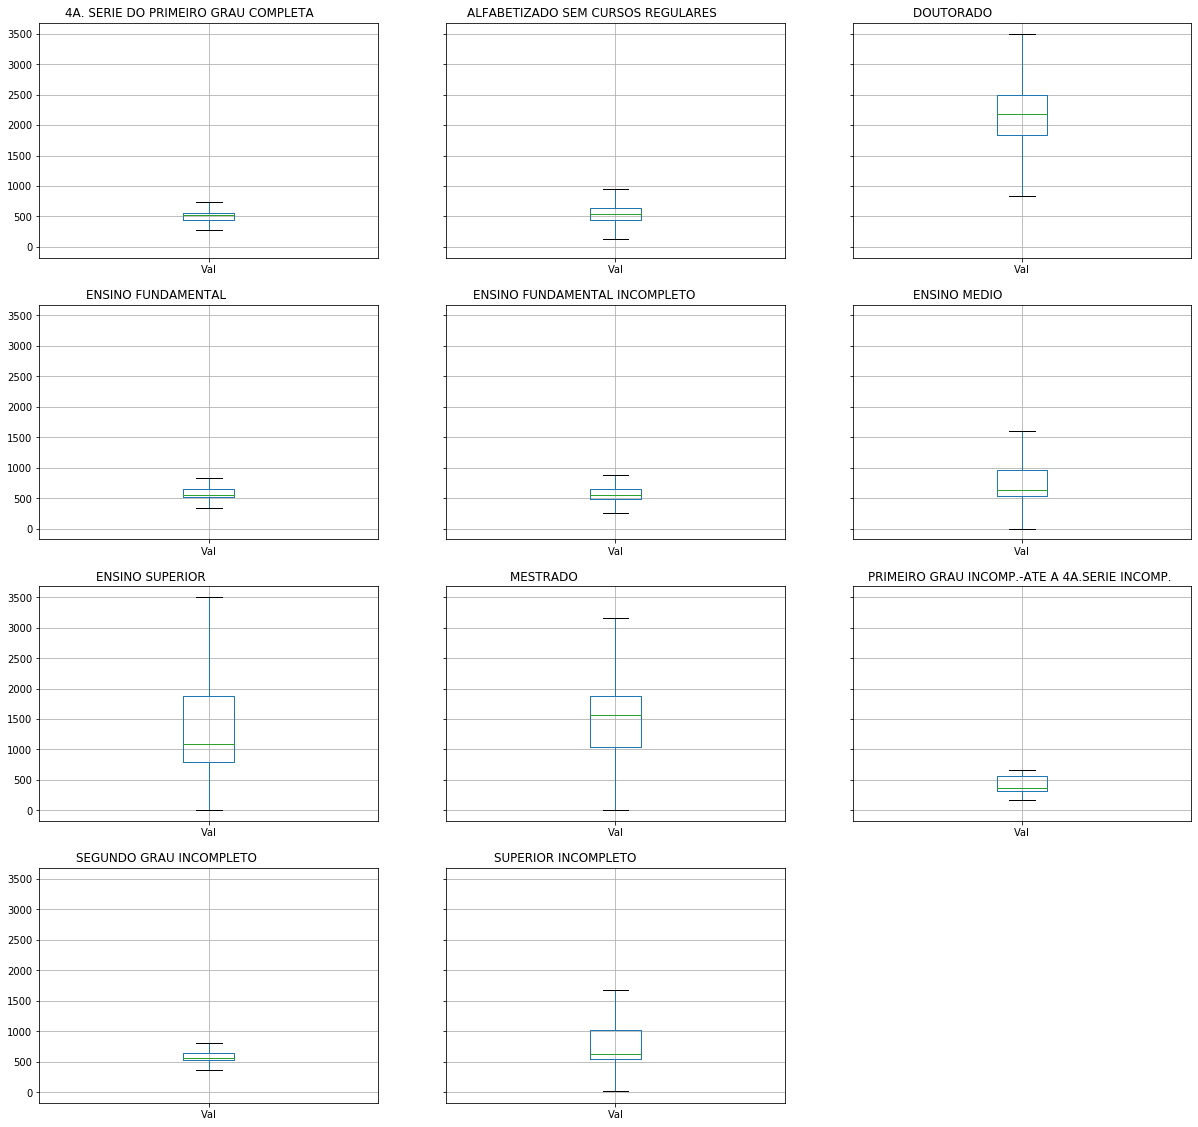

In [42]:
by_education.boxplot(column='Val',  fontsize=10, figsize=(20,20), showfliers=False)

# Agrupando por valor pago

## Com outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f548cf5f208>]],
      dtype=object)

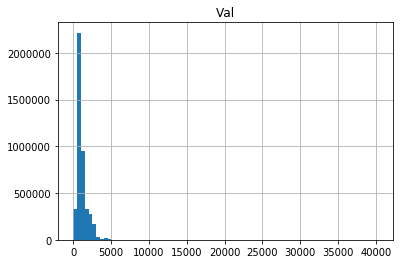

In [81]:
dataset.hist(column='Val',bins=80)

# Sem outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54fe393240>]],
      dtype=object)

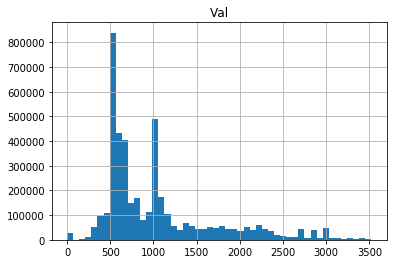

In [73]:
q = dataset["Val"].quantile(0.99)
#description
no_outliers = dataset[dataset['Val'] <  q]
no_outliers.hist(column='Val',bins=50)
